<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/1_CIFAR10_ALUMNOS_DIPLOMADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

## ORGANIZAMOS NUESTROS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Usamos matplotlib para mostrar algunas imágenes de CIFAR10

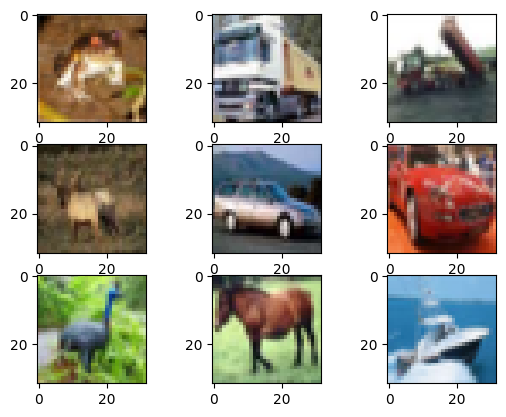

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

plt.show()

Usamos el método to_categoriacal para asignar a cada imagen una categoría.

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[34])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


SE BARAJEAN LAS IMÁGENES PARA EL ENTRENAMIENTO Y VALIDACIÓN

In [ ]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

# DEFINIMOS LA ARQUITECTURA CNN

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# Segunda capa
model.add(layers.Conv2D(44, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Aplanado y clasificacion
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## Definimos los hiperparámetros

In [ ]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train,
                      epochs=10, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/10
313/313 [==============================] - 3s 7ms/step - loss: 4.9480 - acc: 0.2723 - val_loss: 1.8920 - val_acc: 0.3462
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.6406 - acc: 0.4266 - val_loss: 1.5675 - val_acc: 0.4511
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 1.3318 - acc: 0.5341 - val_loss: 1.5141 - val_acc: 0.5070
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 1.0986 - acc: 0.6230 - val_loss: 1.4826 - val_acc: 0.5355
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.8898 - acc: 0.6968 - val_loss: 1.4731 - val_acc: 0.5683
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.6976 - acc: 0.7645 - val_loss: 1.5988 - val_acc: 0.5938
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.5404 - acc: 0.8173 - val_loss: 1.8688 - val_acc: 0.5796
Epoch 8/10
313/313 [==============================] - 2s 6ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 44)        12716     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 44)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2816)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

# Ejemplo para graficar la perdida y exactitud del entrenamiento y el conjunto de validación

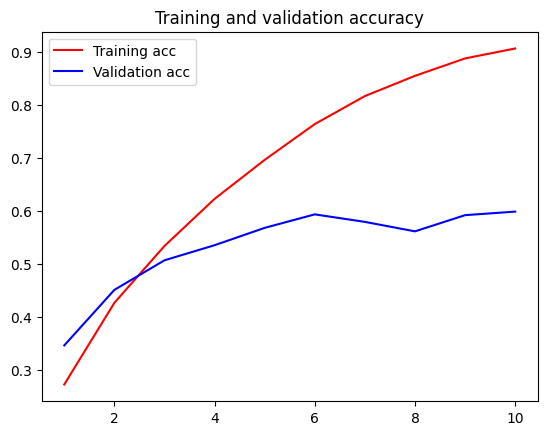

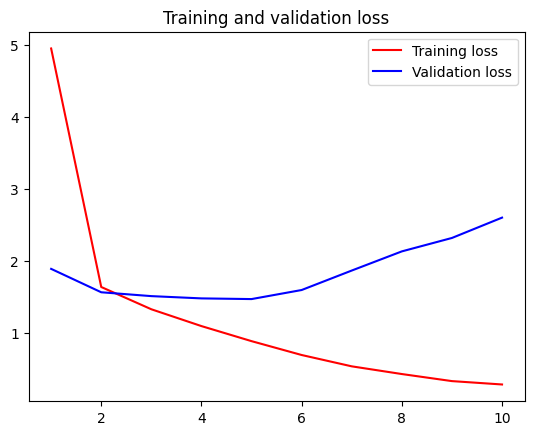

In [ ]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# UNA SEGUNDA PROPUESTA DE ARQUITECTURA considerando el Dropout

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Se definen los Hiperparámetros

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_log = model.fit(x_train, y_train,
                      epochs=100, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/100
313/313 [==============================] - 8s 11ms/step - loss: 7.3501 - acc: 0.1200 - val_loss: 2.2902 - val_acc: 0.1181
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 2.1400 - acc: 0.2180 - val_loss: 2.0392 - val_acc: 0.2397
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 1.8136 - acc: 0.3481 - val_loss: 1.6588 - val_acc: 0.4149
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6292 - acc: 0.4280 - val_loss: 1.4906 - val_acc: 0.4855
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.5135 - acc: 0.4707 - val_loss: 1.3891 - val_acc: 0.5353
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 1.4349 - acc: 0.5006 - val_loss: 1.3575 - val_acc: 0.5282
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 1.3717 - acc: 0.5244 - val_loss: 1.3292 - val_acc: 0.5555
Epoch 8/100
313/313 [==============================] - 3s 8ms/step -

Se grafican los resultados

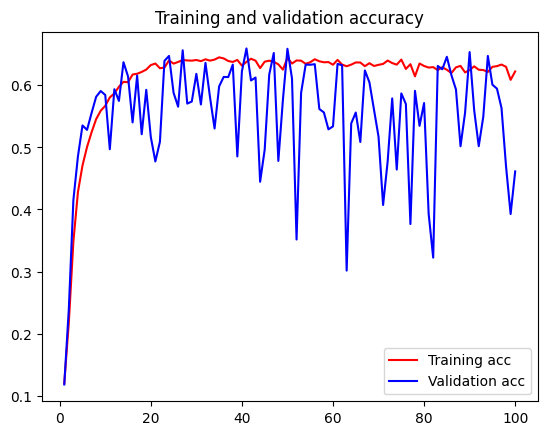

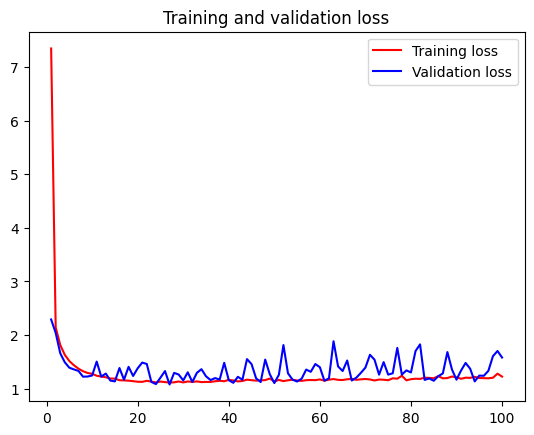

In [ ]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#EJERCICIO, PROPONGA SU PROPIA ARQUITECTURA DE LAS DOS QUE DEFINIMOS (NETRON)Y GRAFIQUE SUS RESULTADOS.

In [1]:
from keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


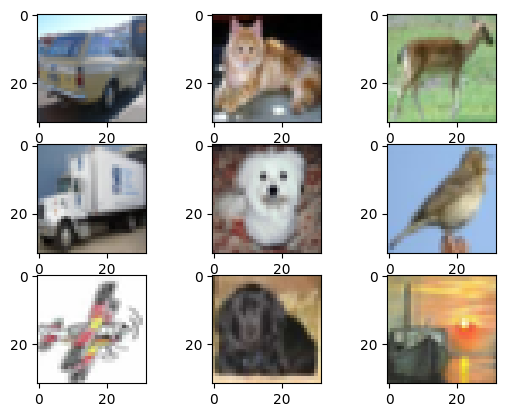

In [15]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])

plt.show()

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
import numpy as np

np.random.seed(30)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Definir la arquitectura de la CNN similar a LeNet-5
model = models.Sequential([
    # Especificar explícitamente la forma de entrada
    Input(shape=(32, 32, 3)),
    # Primera capa convolucional con 15 filtros de tamaño 3x3 y función de activación tanh
    layers.Conv2D(15, (3,3), activation = "tanh", padding = "valid", strides = 1),
    # Capa de pooling promedio con tamaño de ventana 2x2 y stride 2
    layers.AveragePooling2D(pool_size=(2, 2), strides = 2),
    # Segunda capa convolucional con 30 filtros de tamaño 5x5 y función de activación tanh
    layers.Conv2D(30, (5,5), activation = "tanh", padding = "valid", strides = 1),
    # Segunda capa de pooling promedio con tamaño de ventana 2x2 y stride 2
    layers.AveragePooling2D(pool_size=(2, 2), strides = 2),
    # Tercera capa convolucional con 60 filtros de tamaño 5x5 y función de activación tanh
    layers.Conv2D(60, (5, 5), activation='tanh', padding='valid', strides=1),
    # Aplanar las salidas para conectarlas a las capas densas
    layers.Flatten(),
    # Primera capa densa con 30 neuronas y función de activación tanh
    layers.Dense(30, activation = "tanh"),
    # Capa de salida con 10 neuronas (una por cada clase) y función de activación softmax
    layers.Dense(10, activation='softmax')
])

# Guardar el modelo en un archivo .h5
model.save('arquitectura_tarea.keras')

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 15)        420       
                                                                 
 average_pooling2d_10 (Aver  (None, 15, 15, 15)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 30)        11280     
                                                                 
 average_pooling2d_11 (Aver  (None, 5, 5, 30)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 60)          45060     
                                                                 
 flatten_5 (Flatten)         (None, 60)               

In [25]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train,
                      epochs=30, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/30
313/313 [==============================] - 3s 6ms/step - loss: 1.9660 - acc: 0.2831 - val_loss: 1.7065 - val_acc: 0.4008
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 1.6236 - acc: 0.4222 - val_loss: 1.6625 - val_acc: 0.4170
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 1.5074 - acc: 0.4671 - val_loss: 1.5223 - val_acc: 0.4591
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 1.4271 - acc: 0.4965 - val_loss: 1.4290 - val_acc: 0.4958
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3678 - acc: 0.5171 - val_loss: 1.4669 - val_acc: 0.4850
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 1.3248 - acc: 0.5338 - val_loss: 1.3530 - val_acc: 0.5233
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.2826 - acc: 0.5469 - val_loss: 1.3304 - val_acc: 0.5328
Epoch 8/30
313/313 [==============================] - 2s 5ms/step - loss: 1.

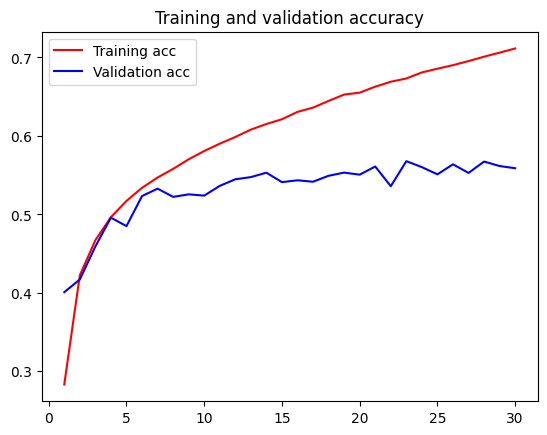

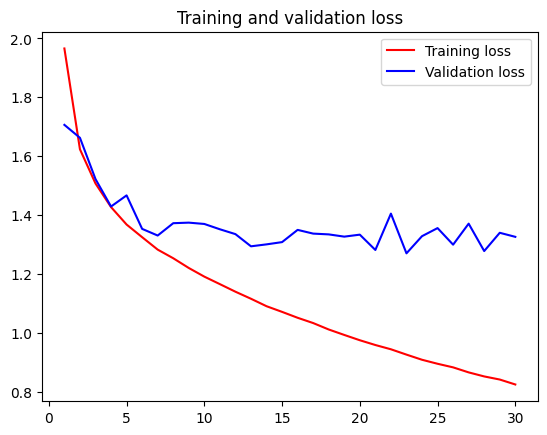

In [27]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()